<a href="https://colab.research.google.com/github/vrose99/ds4bme/blob/master/Quiz3vrose9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Victoria Rose
#### vrose9@jhu.edu
#### vrose99

In [0]:
# Import libraries

import numpy as np
import math
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import sklearn.linear_model as lm

### Question 1 

Text(0.5, 0, 'Temperature')

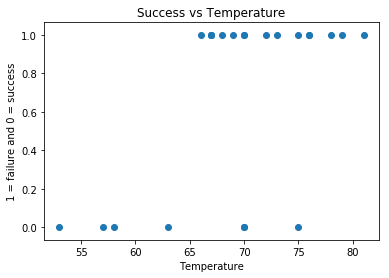

In [5]:
# Part 1
df = pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv')
y = [0]*len(df)
for i in range(len(df)):
  if  df['Total'][i] >= 1:
    y[i] = 0
  else:
    y[i] = 1
df['Success'] = y
#df.head(n=10)
plt.figure()
plt.scatter(df['Temperature'],df['Success'])
plt.title('Success vs Temperature')
plt.ylabel('1 = failure and 0 = success')
plt.xlabel('Temperature')

Text(0.5, 0, 'Temperature')

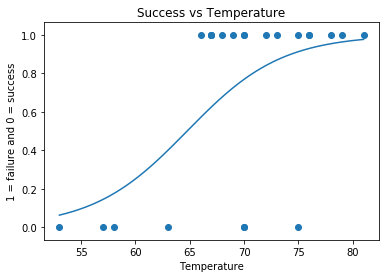

In [6]:
lr = lm.LogisticRegression(fit_intercept=True,solver='newton-cg')
temp = df['Temperature'].values
succ = df['Success'].values
type(temp)
#fit = lr.fit(df['Temperature'].reshape(1, -1),df['Success'].reshape(1, -1))
fit = lr.fit(temp.reshape(-1,1),succ)
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
plt.scatter(temp,succ)
n = 1000
xplot = np.linspace(min(temp), max(temp), n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))
plt.plot(xplot,p)
plt.title('Success vs Temperature')
plt.ylabel('1 = failure and 0 = success')
plt.xlabel('Temperature')

In [7]:
range = max(temp)-min(temp)
position = (range)/1000
seventyfour = (1 - p[int((74-min(temp))/position)])*100
print('The probability of failure at 74 degrees is %f percent' %seventyfour)

The probability of failure at 74 degrees is 10.660164 percent


#### Question 2

### Part a
$$P(Y_i = 1 | x_i) = \frac{e^{\beta_0(1-x_i)+\beta_1X_i}}{1 + e^{\beta_0(1-x_i)+\beta_1X_i}}$$
$$\text{and then we let: }\theta(\beta_0,\beta_1,X_i) = e^{\beta_0(1-x_i)+\beta_1X_i}$$
$$\displaystyle\prod_{i=1}^{n}\theta(\beta_0,\beta_1,X_i)^{Y_i}[1 - \theta(\beta_0,\beta_1,X_i)]^{1 - Y_i}$$\
$$ * = \displaystyle\prod_{i=1}^{n}  (\frac{e^{\beta_0(1-x_i)+\beta_1X_i}}{1 + e^{\beta_0(1-x_i)+\beta_1X_i}})^{Y_i}(\frac{1}{1+ e^{\beta_0(1-x_i)+\beta_1X_i}})^{1-Y_i}$$\
$$ log(*) = \sum_{i =1}^{n}(\beta_0(1-X_i)+\beta_1X_i)Y_i - \sum_{i=1}^{n}log(1+e^{\beta_0(1-x_i)+\beta_1X_i})$$

### Part b
$$\text{When }x_i = 0 \text{ and } X_i =1$$
$$* = \sum_{X_i=0,\text{  }Y_i=1,0}^{n}\beta_0Y_i - \sum_{X_i=0,\text{  }Y_i=1,0}^{n}log(1+e^{\beta_0}) + \sum_{X_i=1,\text{  }Y_i=1,0}^{n}\beta_0Y_i - \sum_{X_i=1,\text{  }Y_i=1,0}^{n}log(1+e^{\beta_0}) $$

### Part c
$$\text{Then we take the derivative to find the point of interest}$$

$$\frac{\partial}{\partial {\beta_0}}(*) = \sum_{X_i=0,\text{  }Y_i=1,0}^{n}(Y_i-\frac{e^{\beta_0}}{1+e^{\beta_0}}) = 0$$

$$n\bar{y}^{(0)} - \frac{ne^{\beta_0}}{1+e^{\beta_0}} = 0$$
$$\bar{y}^{(0)} = \frac{e^{\beta_0}}{1+e^{\beta_0}}$$
 
  
$$\bar{y}^{(0)} + \bar{y}^{(0)}e^{\beta_0} = e^{\beta_0}$$
$$ \bar{y}^{(0)} = e^{\beta_0}-e^{\beta_0}\bar{y}^{(0)}$$

$$\frac{\bar{y}^{(0)}}{1-\bar{y}^{(0)}} = e^{\beta_0}$$
$$\hat{\beta_0} = log(\frac{\bar{y}^{(0)}}{1-\bar{y}^{(0)}} )$$
$$\text{This extends symmetrically for } \beta_1 :$$
$$\frac{\partial}{\partial {\beta_1}}(*) = \sum_{X_i=1,\text{  }Y_i=1,0}^{n}(Y_i-\frac{e^{\beta_1}}{1+e^{\beta_1}}) = 0$$
$$\text{The same steps as those for } \beta_0 \text{ extend for }\beta_1 \text{to end up with}$$
$$\hat{\beta_1} = log(\frac{\bar{y}^{(1)}}{1-\bar{y}^{(1)}} )$$

### Question 3

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/vrose99/ds4bme/master/ufo-sightings-QueryResult.csv')
df.head(n=10)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_location,city_longitude
0,"Three saucer shaped ships. High in the sky, m...",Salem,OR,NaN,disk,15 minutes,Occurred : 8/15/1950 14:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/135/S135871.html,"Three saucer shaped ships. High in the sky, m...",NaN,44.941247,POINT(-123.00423516160726 44.941247110675775),-123.004235
1,Tear-drop shaped silent craft with sectional f...,Ellsworth,ME,NaN,teardrop,5 minutes,Occurred : 8/15/1967 21:30 (Entered as : 08/0...,http://www.nuforc.org/webreports/132/S132451.html,Tear-drop shaped silent craft with sectional f...,NaN,44.651300,POINT(-68.45069999999998 44.6513),-68.450700
2,"Two UFOs over Rockville, MD. ((anonymous repo...",Rockville,MD,2017-03-17T02:00:00,changing,5,Occurred : 3/17/2017 02:00 (Entered as : 3/17...,http://www.nuforc.org/webreports/133/S133154.html,"Two UFOs over Rockville, MD. The two object ap...",2017-03-17T00:00:00,39.077938,POINT(-77.14956651162731 39.07793837209271),-77.149567
3,We saw two red dots of apparent unearthly origin.,Grand Rapids,MI,1996-08-15T02:30:00,light,20 minutes,Occurred : 8/15/1996 02:30 (Entered as : 2 we...,http://www.nuforc.org/webreports/002/S02057.html,Summary : We saw two red dots of apparent unea...,1998-03-07T00:00:00,42.943342,POINT(-85.64301557417605 42.94334184327165),-85.643016
4,CAPSULE SHAPED CRAFT RAPIDLY DESCENDS INTO WAR...,Fords,NJ,2017-04-29T19:05:00,other,30 seconds,Occurred : 4/29/2017 19:05 (Entered as : 4/29...,http://www.nuforc.org/webreports/133/S133934.html,CAPSULE SHAPED CRAFT RAPIDLY DESCENDS INTO WAR...,2017-05-06T00:00:00,40.537700,POINT(-74.31109999999993 40.53770000000003),-74.311100
5,A stationary bowl shaped object with colored l...,Dahlonega,GA,2000-09-09T22:30:00,changing,at least 1 hour,Occurred : 9/9/2000 22:30 (Entered as : 09/09...,http://www.nuforc.org/webreports/014/S14085.html,A stationary bowl shaped object with colored l...,2000-09-17T00:00:00,34.532548,POINT(-83.98485789473699 34.53254842105263),-83.984858
6,"I am a police officer in Portugal, Azores, Ter...",Praia da Vitoria (Azores)(Portugal),NaN,2015-07-25T01:15:00,other,30 seconds,Occurred : 7/25/2015 01:15 (Entered as : 07/2...,http://www.nuforc.org/webreports/120/S120625.html,"I am a police officer in Portugal, Azores, Ter...",2015-07-31T00:00:00,NaN,NaN,NaN
7,Two bright orange lights through the trees. (...,Tumwater,WA,2015-07-25T03:00:00,fireball,Ongoing,Occurred : 7/25/2015 03:00 (Entered as : 07/2...,http://www.nuforc.org/webreports/120/S120637.html,I just wrote a report a few days ago. Am nan...,2015-07-31T00:00:00,47.007300,POINT(-122.9093 47.0073),-122.909300
8,Never seen anything like that before. Definite...,Neoga,IL,2015-07-25T10:40:00,fireball,1-2 minutes,Occurred : 7/25/2015 10:40 (Entered as : 07/2...,http://www.nuforc.org/webreports/120/S120655.html,Never seen anything like that before. Definit...,2015-07-31T00:00:00,39.310300,POINT(-88.4485 39.3103),-88.448500
9,The photo I took had a total of three objects.,Hutto,TX,2015-07-25T16:45:00,triangle,5 minutes,Occurred : 7/25/2015 16:45 (Entered as : 07/2...,http://www.nuforc.org/webreports/120/S120646.html,The photo I took had a total of three objects....,2015-07-31T00:00:00,30.542700,POINT(-97.54669999999996 30.542699999999982),-97.546700


I know there would have to be some basic data cleaning on the time column in order to use those numbers, I am not sure if that would be better or if I just want to count sightings total 